# Exploring the data

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import all necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects


import warnings
warnings.filterwarnings('ignore')


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize


import plotly.graph_objects as go
from nltk.corpus import stopwords

In [5]:
df = pd.read_csv("/content/drive/MyDrive/US_Accidents_Dec21_updated.csv")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,08-02-2016 00:37,08-02-2016 06:37,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,08-02-2016 00:53,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,08-02-2016 05:56,08-02-2016 11:56,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,08-02-2016 05:58,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,08-02-2016 06:15,08-02-2016 12:15,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,08-02-2016 05:53,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day


In [8]:
df.isnull().sum()

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   615177
Street                        1
Side                          0
City                         55
County                        0
State                         0
Zipcode                     435
Country                       0
Timezone                   1026
Airport_Code               3647
Weather_Timestamp         15516
Temperature(F)            21746
Wind_Chill(F)            214122
Humidity(%)               22728
Pressure(in)              18585
Visibility(mi)            22534
Wind_Direction            22626
Wind_Speed(mph)           57687
Precipitation(in)        231683
Weather_Condition         22892
Amenity                       0
Bump    

# EDA

## States

In [9]:
df.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
1048570    MO
1048571    NY
1048572    NC
1048573    FL
1048574    CA
Name: State, Length: 1048575, dtype: object

In [10]:
states = df.State.unique()
len(states)

49

In [11]:
states_by_accident = df.State.value_counts()
states_by_accident[:5]

CA    265613
FL    170235
TX     62244
VA     46236
NY     42439
Name: State, dtype: int64

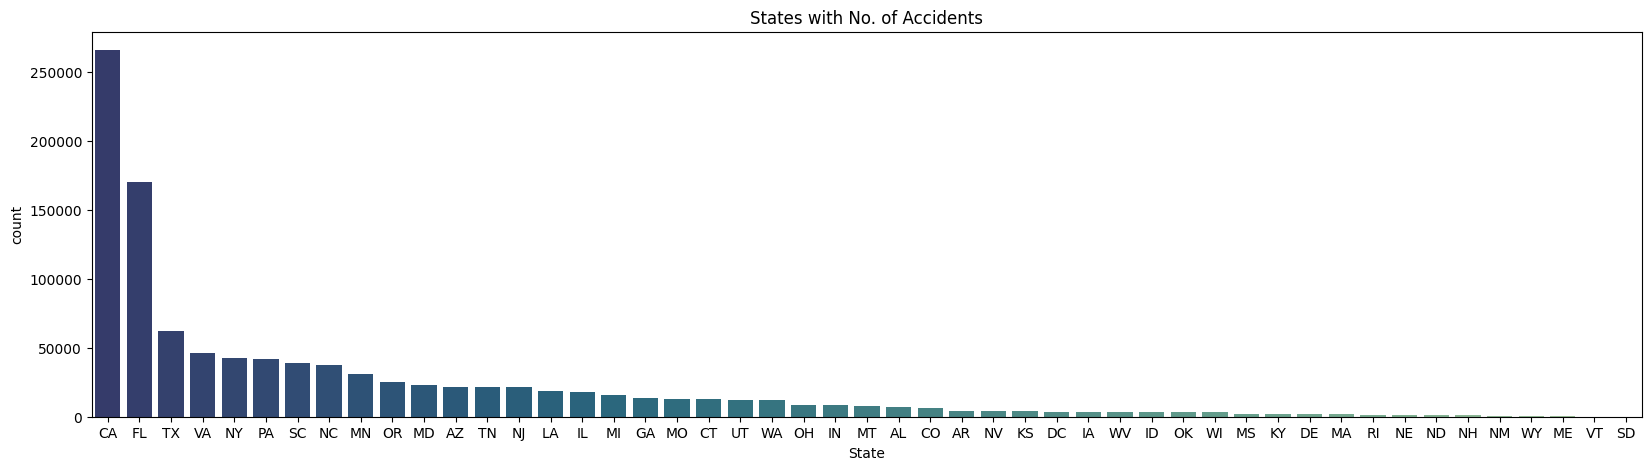

In [12]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="State", data=df, orient = 'v', palette = "crest_r", order = df['State'].value_counts().index)
c.set_title("States with No. of Accidents");

- Among the top 100 cities in number of accidents, which states do they belong to most frequently.

- The cities with most number of accidents are California, Florida, Texas, Oregon, Virginia.

- California (CA) is the 3rd most largest state of US after Texas (TX) and Alaska (AL)
- Also California (CA) is the most populated among all, followed by Texas (TX)
- Alaska (AL) is the largest state but least populated state at 48th rank

In [13]:
max_acc_state=df['State'].value_counts().head(10)


Text(0.5, 1.0, 'States in US reported most accident cases')

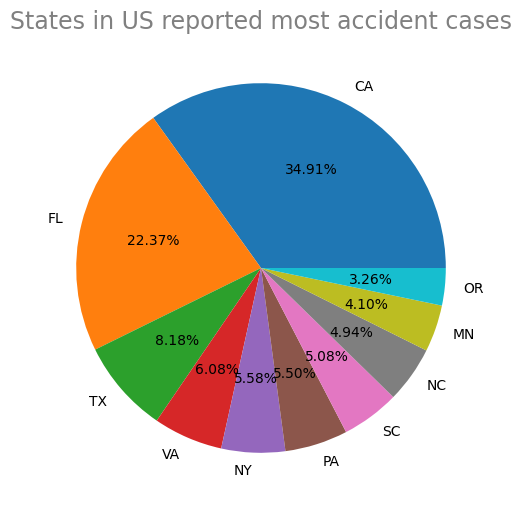

In [14]:
plt.figure(figsize=(10,6))
plt.pie(max_acc_state,labels=max_acc_state.index,autopct='%.2f%%')
plt.title("States in US reported most accident cases",size=17,color="grey")

In [15]:
df_st_ct = pd.value_counts(df['State'])

fig = go.Figure(data=go.Choropleth(
    locations=df_st_ct.index,
    z = df_st_ct.values.astype(float),  # Data to be color-coded
    locationmode = 'USA-states',     # set of locations match entries in `locations`
    colorscale = 'YlOrRd',
    colorbar_title = "Count",
))

fig.update_layout(
    title_text = 'US Accidents by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

## City

In [16]:
cities = df.City.unique()
len(cities)
cities

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Yankeetown', 'Wilbur',
       'Marion Center'], dtype=object)

In [17]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

Miami           46971
Orlando         25984
Los Angeles     23048
Dallas          18044
Houston         16985
Charlotte       14686
Sacramento      10622
San Diego        9964
Raleigh          9206
Nashville        8423
Minneapolis      7846
Austin           7588
Baton Rouge      7403
New Orleans      6438
Phoenix          6355
Saint Paul       5494
Jacksonville     5484
Kansas City      5434
Atlanta          5166
Tucson           4921
Name: City, dtype: int64

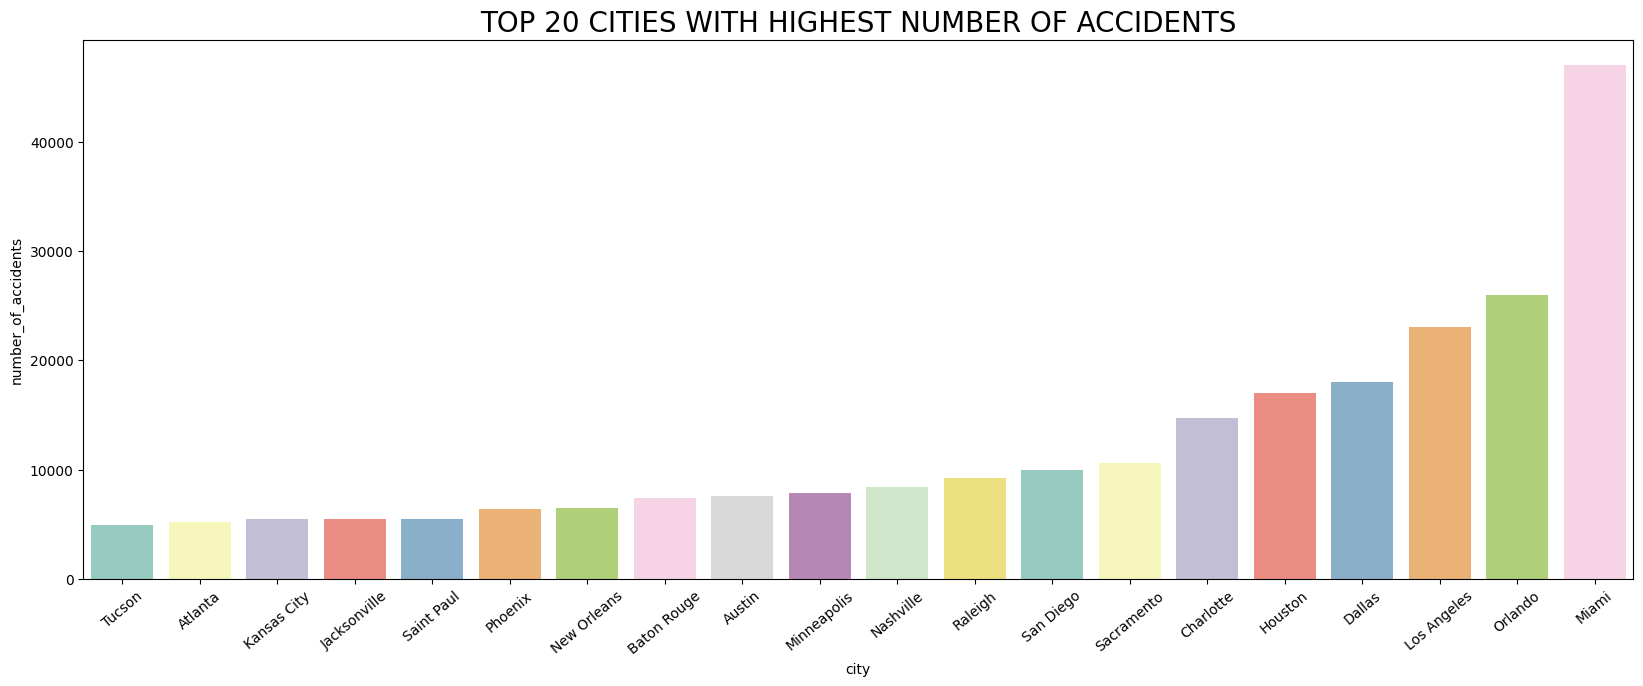

In [18]:
cities_20_by_accident=df["City"].value_counts().sort_values()[-20:].reset_index()
cities_20_by_accident.columns=["city","number_of_accidents"]

plt.figure(figsize=(20,7))
sns.barplot(x="city",y="number_of_accidents",data=cities_20_by_accident , palette='Set3')
plt.title("TOP 20 CITIES WITH HIGHEST NUMBER OF ACCIDENTS",fontsize=20)
plt.xticks(rotation=40)
plt.show()

- There is quite a lot of presence of cities from Florida (Miami, Orlando)followed by California (LA, Sacramento, San Diego, Jacksonville), Texas (Houston, Dallas, Austin) , and North Carolina (Charlotte,Raleigh). This is in tandem with the top states: Florida,California, Texas, and North Carolina.

<Axes: >

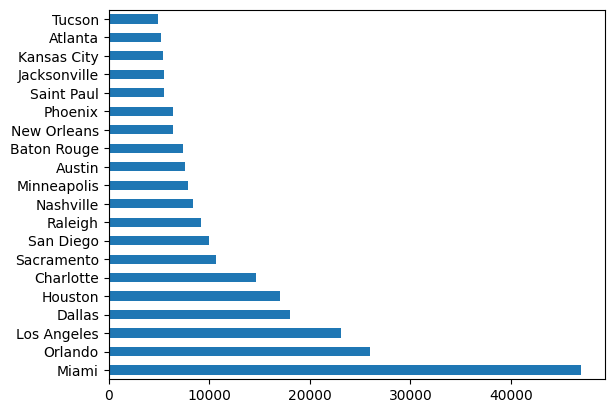

In [19]:
cities_by_accident[:20].plot(kind = 'barh')

In [20]:
top_cities=df['City'].value_counts().head(10)

Text(0.5, 1.0, 'Cities in US reported most accident cases')

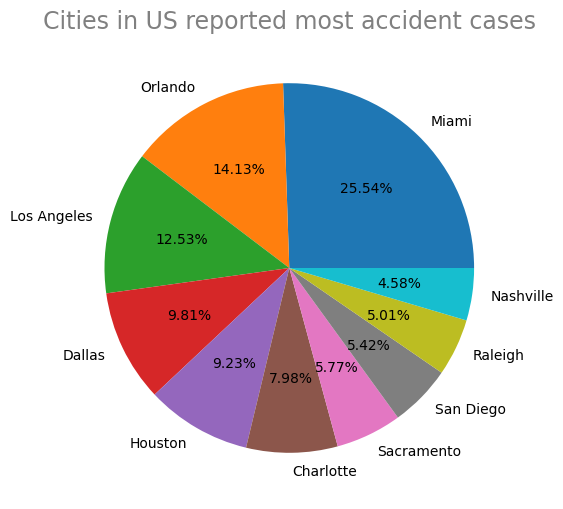

In [21]:
plt.figure(figsize=(10,6))
plt.pie(top_cities,labels=top_cities.index,autopct='%.2f%%')
plt.title("Cities in US reported most accident cases",size=17,color="grey")

In [22]:
import seaborn as sns
sns.set_style("darkgrid")

<Axes: xlabel='City', ylabel='Count'>

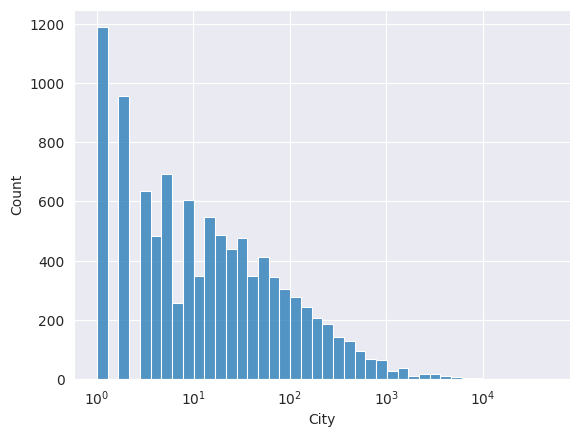

In [23]:
sns.histplot(cities_by_accident,log_scale=True)

Over 1200 cities have reported only one accident during the entire period. This could either be very good news or it could be a result of missing data. Let’s break cities by accidents into two groups and see their respective distributions-

- High accident cities where the number of accidents is greater and equal to 1000.
- Low accident cities where the number is less than 1000.

In [24]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]


In [25]:
len(high_accident_cities)*100/len(cities)

1.4189323278428259

4.24% of the total number of cities have an accident number greater than 1000.

<Axes: xlabel='City', ylabel='Count'>

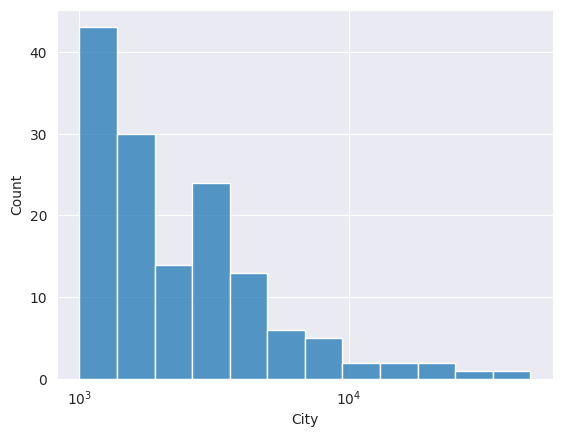

In [26]:
sns.histplot(high_accident_cities,log_scale = True)

Less than 150 cities (out of 11682) reported more than 10000 accidents during the period between February and December .

Similarly, the cities with the low number of accidents are picturized as-

In [27]:
len(low_accident_cities)*100/len(cities)

98.57114506846597

95.74% of the total number of cities have an accident number less than 1000

<Axes: xlabel='City', ylabel='Count'>

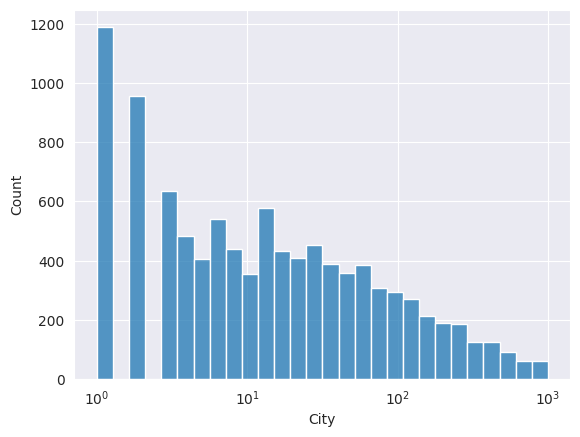

In [28]:
sns.histplot(low_accident_cities,log_scale = True)

## Street

In [29]:
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

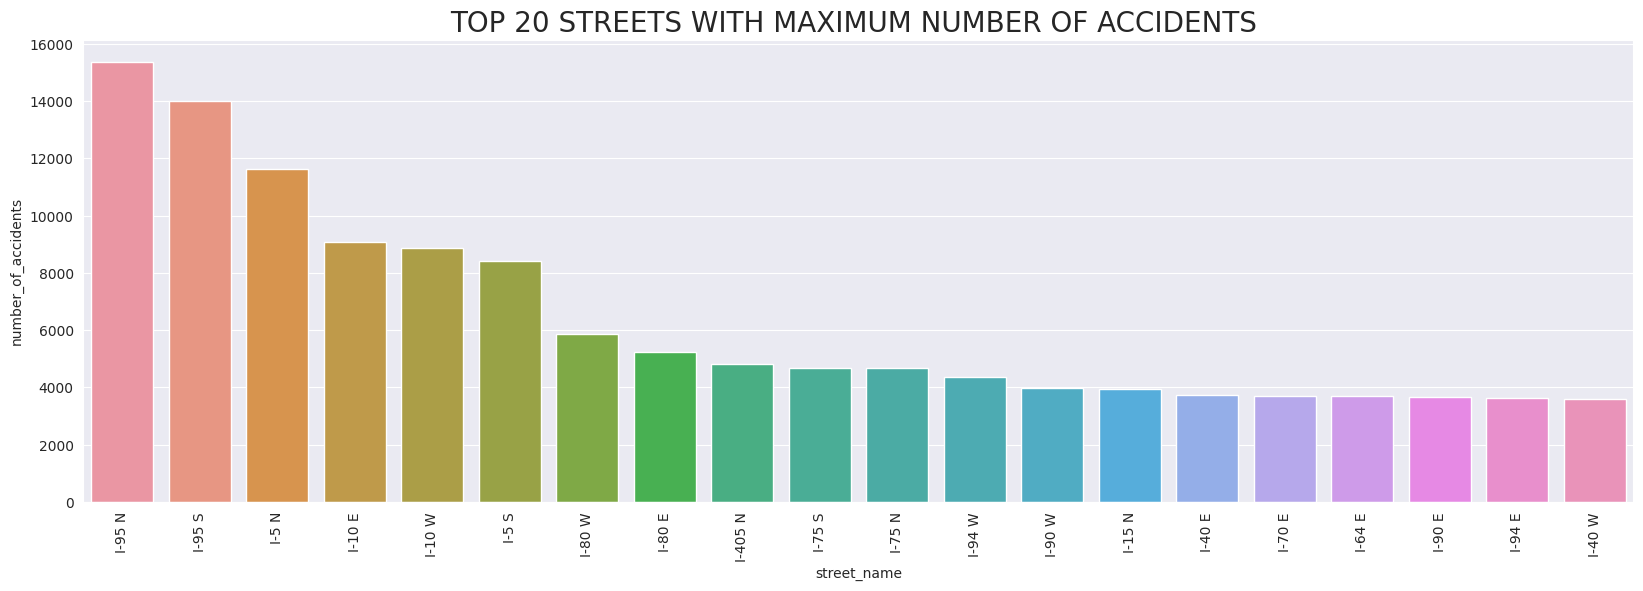

In [30]:
top_streets=street_df[:20]
top_streets.columns=["street_name","number_of_accidents"]

plt.figure(figsize=(20,6))
sns.barplot(x=top_streets["street_name"],y=top_streets["number_of_accidents"])
plt.xticks(rotation=90)
plt.title("TOP 20 STREETS WITH MAXIMUM NUMBER OF ACCIDENTS ",fontsize=20)
plt.show()

- In last 5 years (2016-2020) Street No. I-5 N is having the highest road accidents records.
- In Street No. I-5 N, daily 14 accidents occurred in average.

In [31]:
def street_cases_percentage(val, operator):
    if operator == '=':
        val = street_df[street_df['Cases']==val].shape[0]
    elif operator == '>':
        val = street_df[street_df['Cases']>val].shape[0]
    elif operator == '<':
        val = street_df[street_df['Cases']<val].shape[0]
    print('{:,d} Streets, {}%'.format(val, round(val*100/street_df.shape[0], 2)))
    
    
street_cases_percentage(1, '=')
street_cases_percentage(100, '<')
street_cases_percentage(1000, '<')
street_cases_percentage(1000, '>')
street_cases_percentage(5000, '>')

51,141 Streets, 48.9%
103,331 Streets, 98.8%
104,472 Streets, 99.89%
112 Streets, 0.11%
8 Streets, 0.01%


In Our dataset, there are total 93,048 Streets enlisted for accidental cases,

- There are 36,441 Streets (39%) in US which have only 1 accident record in past 5 years.
-  98% Streets of US, have less than 100 road accident cases.
- Only 0.2% Streets in US have the accident cases greater than 1000.
- In last 5 years record of road accidents, only 24 Streets (0.03%) have greater than 5000 cases.


## Weather

In [32]:
df.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [33]:
df_weather = df.groupby('Weather_Condition')[['ID']].count()
df_weather_20 = df_weather.sort_values('ID',ascending=False).head(20)
df_weather_20

,ID
Weather_Condition,
Fair,403066
Mostly Cloudy,141033
Cloudy,107412
Partly Cloudy,97027
Clear,81210
Light Rain,45423
Overcast,35364
Scattered Clouds,22456
Haze,13522


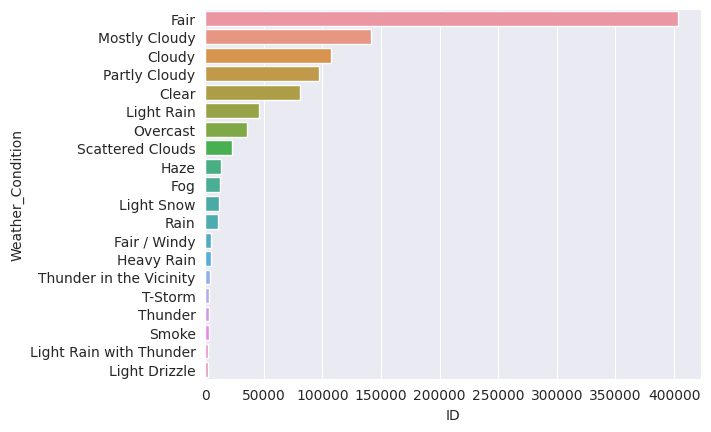

In [34]:
sns.barplot(x='ID', y=df_weather_20.index, data=df_weather_20, orient='h');

- From graph and top 20 dataframe, most of the accidents happened in Fair weather condition.
- It is very surprising that most of the accidents happened in Fair weather.

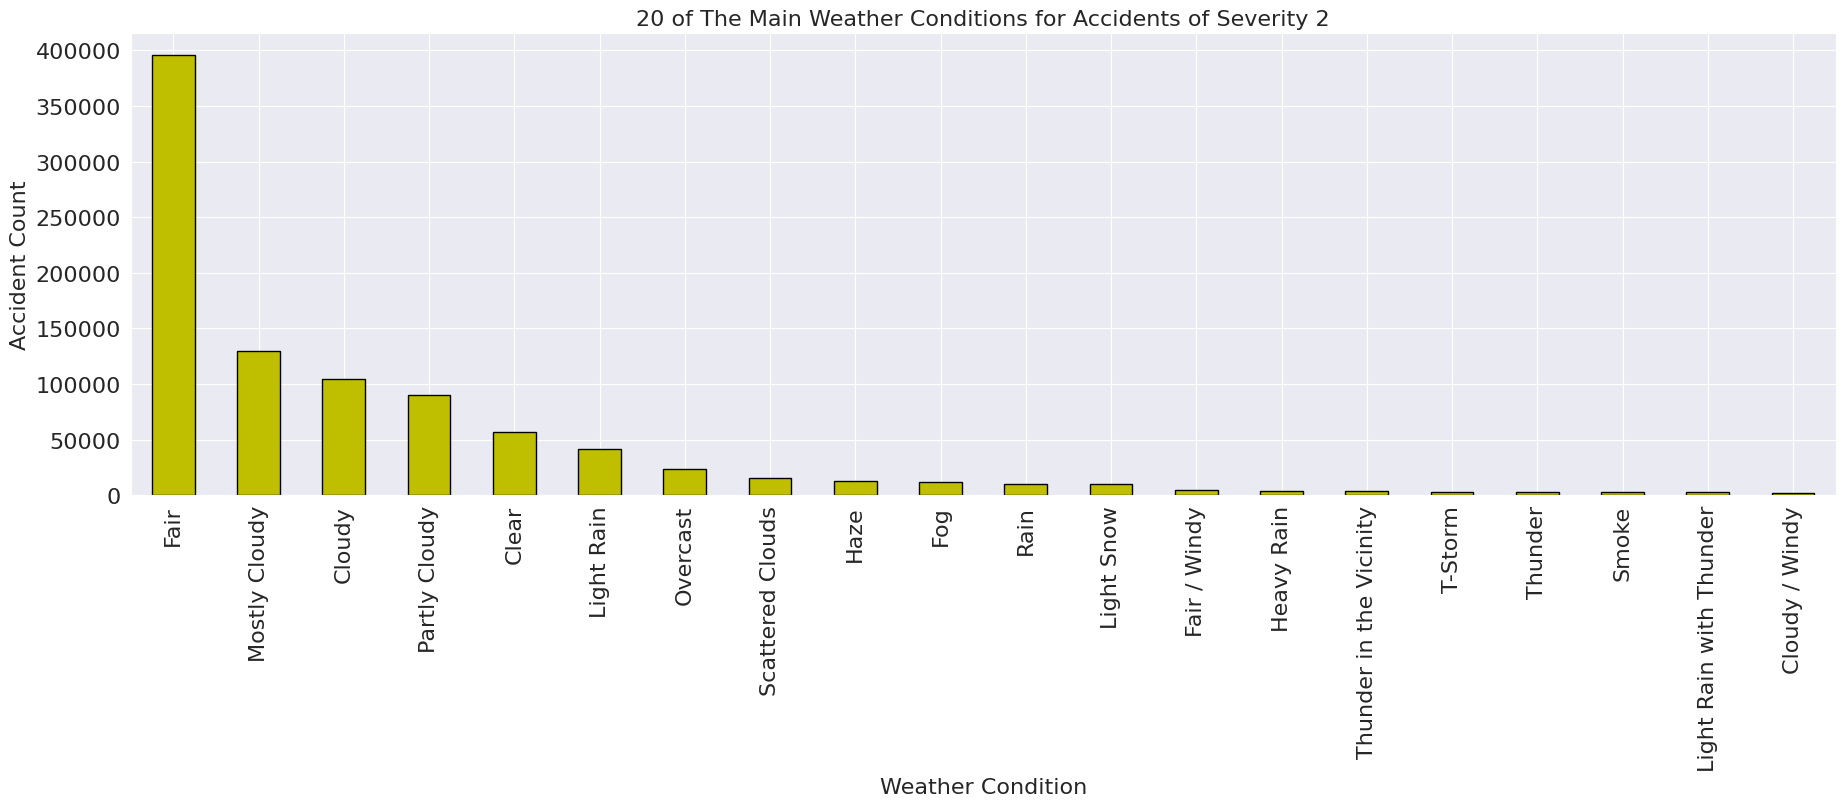

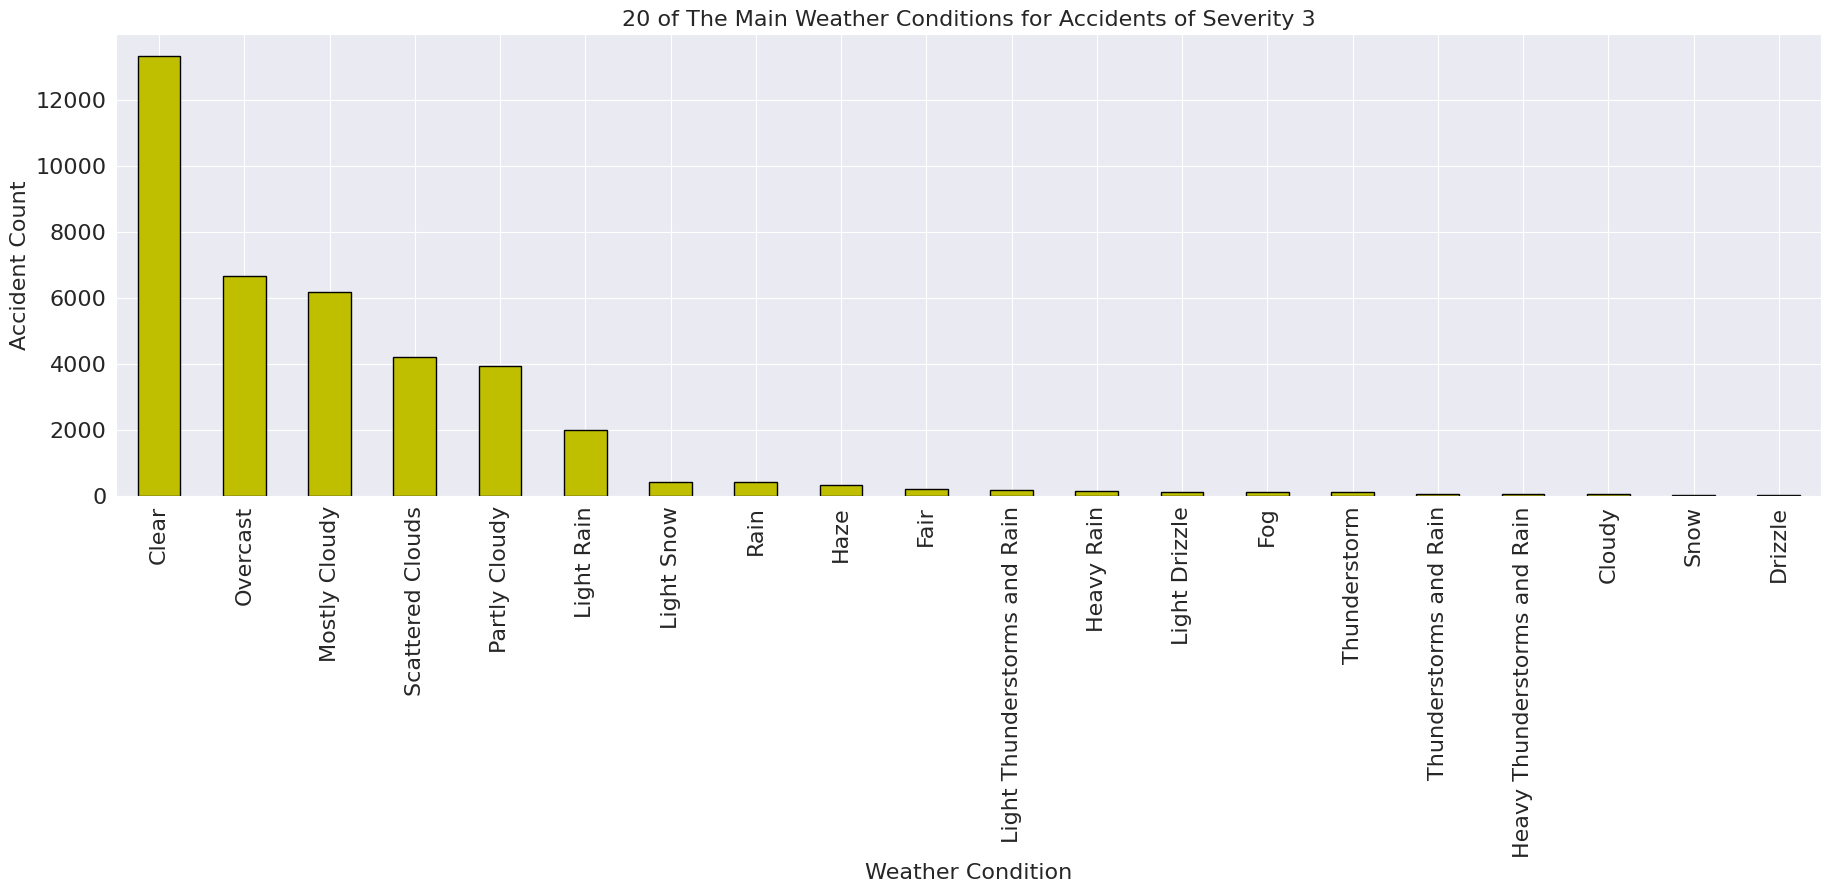

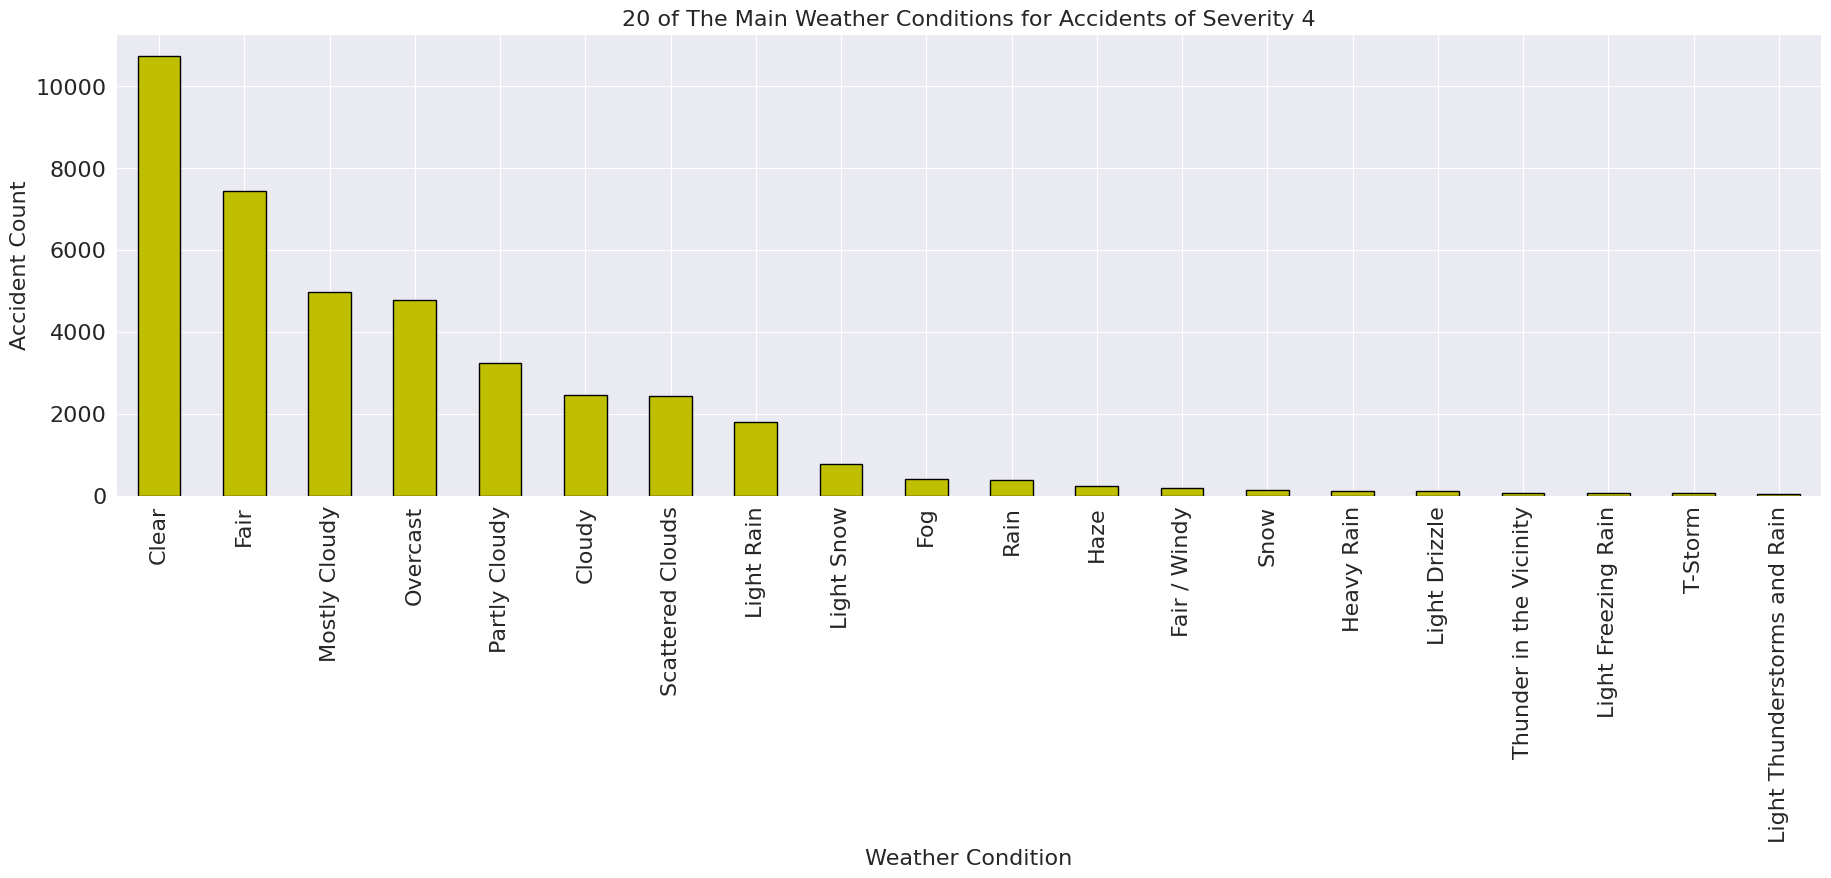

In [35]:
for x in np.arange(1, 5):
    df_x = df.loc[df["Severity"] == x]
    if len(df_x) > 0:
        plt.subplots(figsize=(22, 6))
        df_x['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5, color='y', edgecolor='k', align='center', linewidth=1)
        plt.xlabel('Weather Condition', fontsize=16)
        plt.ylabel('Accident Count', fontsize=16)
        plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(x), fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.show()


## Severity

In [36]:
accidents_severity = df.groupby('Severity').count()['ID']
accidents_severity

Severity
2    966042
3     39989
4     42544
Name: ID, dtype: int64

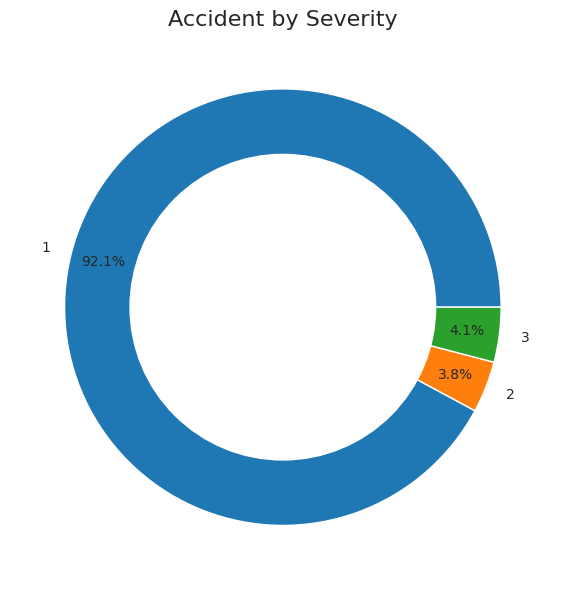

In [37]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
labels = [str(i) for i in range(1, len(accidents_severity) + 1)]
plt.pie(accidents_severity, labels=labels, autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

4.6% of the accidents recorded were found to be very severe

## Distance

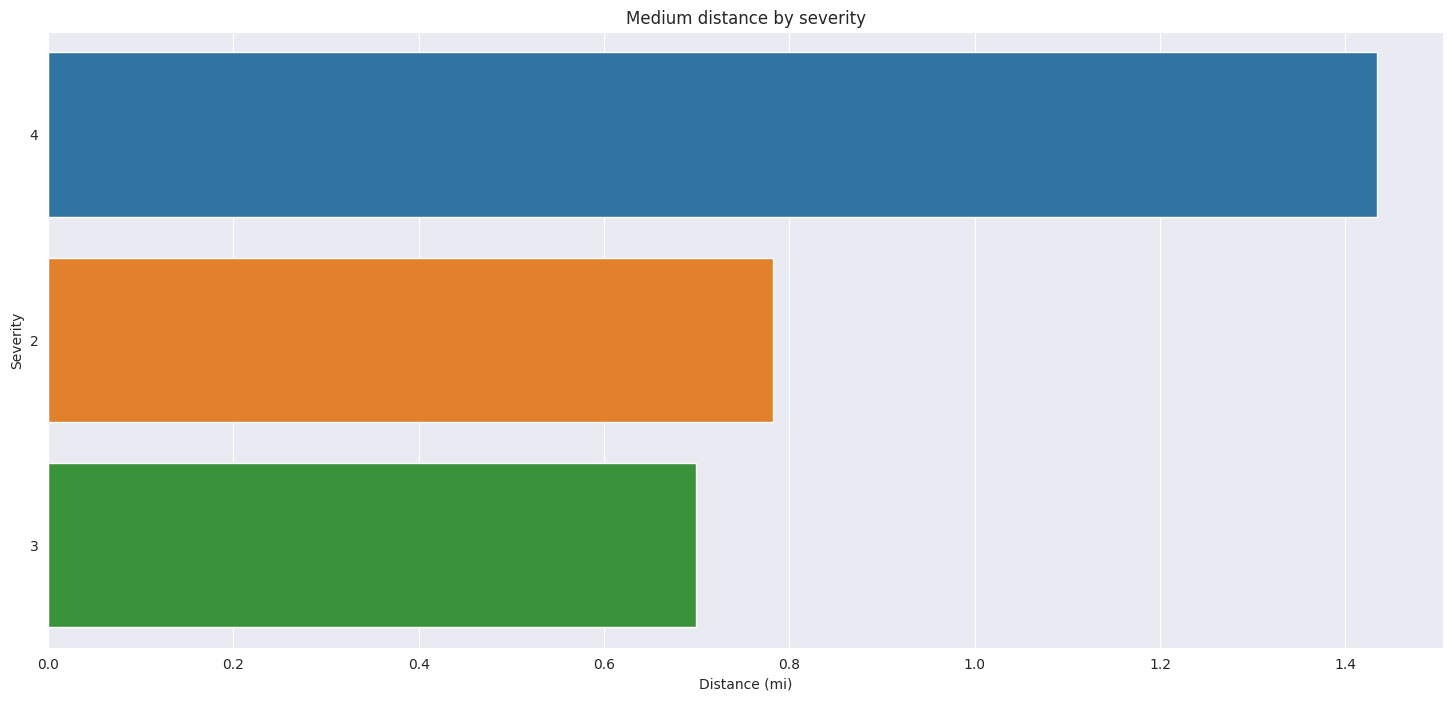

In [38]:
severity_distance = df.groupby("Severity").mean()["Distance(mi)"].sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Medium distance by severity")
sns.barplot(x = severity_distance.values, y = severity_distance.index, orient="h", order=severity_distance.index)
plt.xlabel("Distance (mi)")
plt.show()

In this graph we can see that the distance of the accident is more or less proportional to the severity, and in fact accidents with severity 4 have the longest distance.

## Start_time

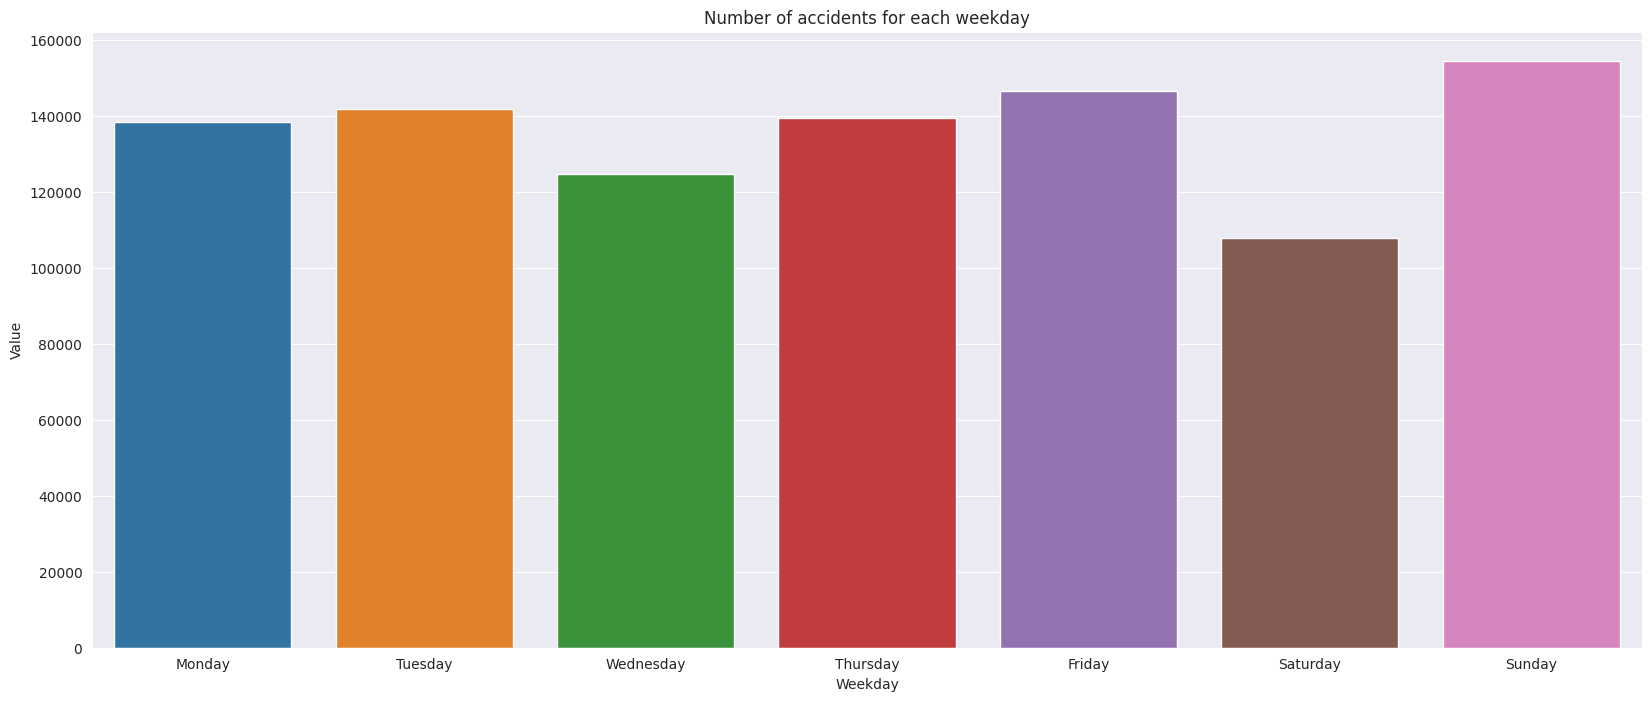

In [39]:
# Filter out invalid datetime values
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce').dropna()

counts = pd.to_datetime(df['Start_Time']).dt.day_name().value_counts()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(x=counts.index, y=counts.values, order=weekdays)
plt.xlabel("Weekday")
plt.ylabel("Value")
plt.show()

As we can see from the plot above, the days with the most accidents are working days, while in the weekend we have a frequency of at least 2/3 less. This may be due to the fact that during the weekend there are fewer cars on the road.

# Data Preprocessing

## Correlation Matrix

In [40]:
# Cast Start_Time to datetime

df["Start_Time"] = pd.to_datetime(df["Start_Time"])

# Extract year, month, weekday and day
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day

# Extract hour and minute
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute

df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,A-1,3,2016-08-02 00:37:00,08-02-2016 06:37,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,08-02-2016 00:53,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016.0,8.0,1.0,2.0,0.0,37.0
1,A-2,2,2016-08-02 05:56:00,08-02-2016 11:56,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,08-02-2016 05:58,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016.0,8.0,1.0,2.0,5.0,56.0
2,A-3,2,2016-08-02 06:15:00,08-02-2016 12:15,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,08-02-2016 05:53,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016.0,8.0,1.0,2.0,6.0,15.0
3,A-4,2,2016-08-02 06:51:00,08-02-2016 12:51,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,08-02-2016 06:54,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,2016.0,8.0,1.0,2.0,6.0,51.0
4,A-5,3,2016-08-02 07:53:00,08-02-2016 13:53,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,08-02-2016 07:53,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016.0,8.0,1.0,2.0,7.0,53.0


We decided to decompose the Start_Time feature in year, month, day, weekday, hour and minute, in order to feed them to the models.



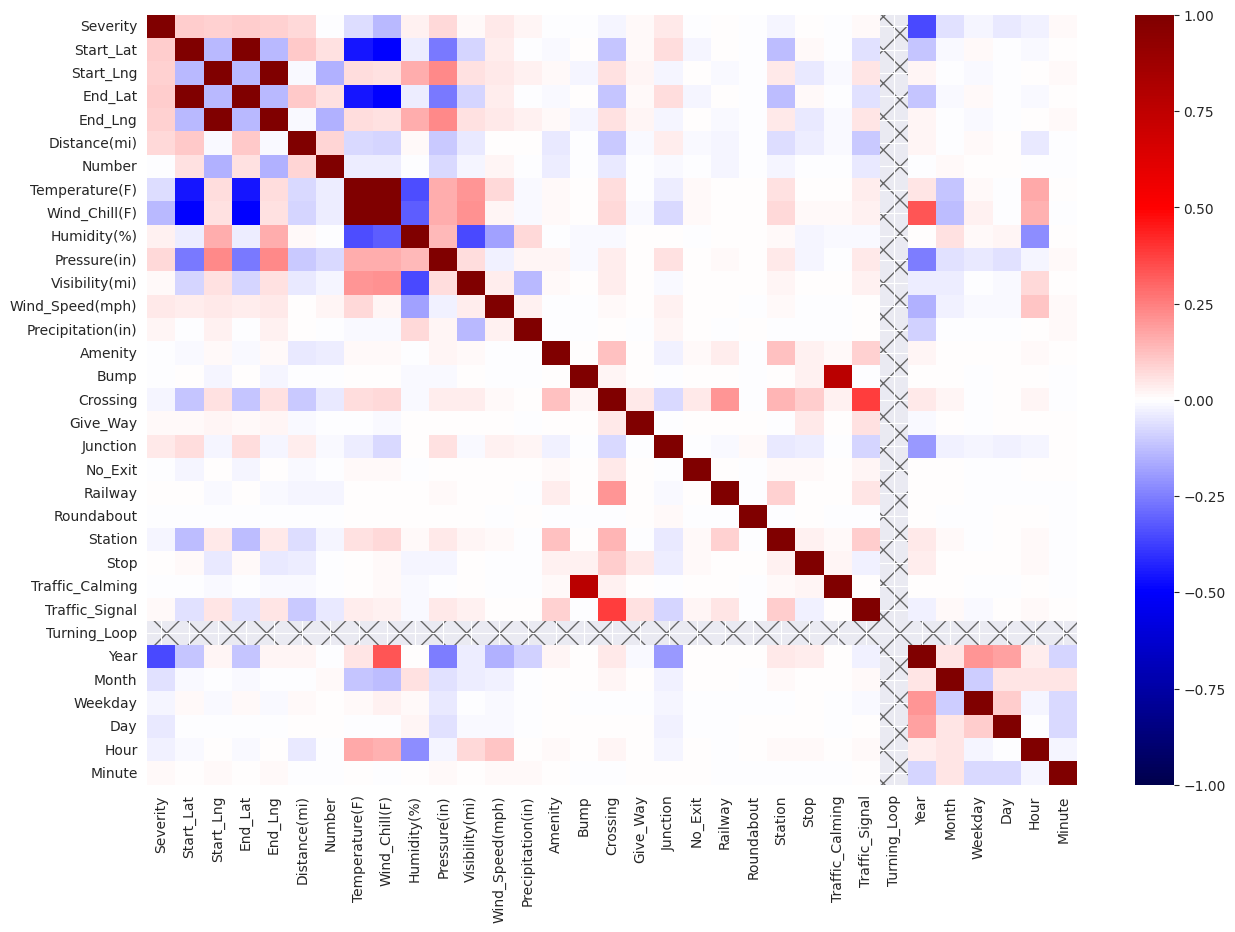

In [41]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

From the matrix we can see that the start and end GPS coordinates of the accidents are highly correlated.

In fact, from the medium distance shown before, the end of the accident is usually close to the start, so we can consider just one of them for the machine learning models.

Moreover, the wind chill (temperature) is directly proportional to the temperature, so we can also drop one of them.

We can also see that the presence of a traffic signal is slightly correlated to the severity of an accident meaning that maybe traffic lights can help the traffic flow when an accident occurs.

From the matrix we can also note that we couldn't compute the covariance with Turning_Loop, and that's because it's always False.

## Feature Selection

From the observations made with the correlation matrix, we are going to drop the following features:
- End_Lat and End_Lng
- Wind Chill

Moreover, we are going to drop the following features:
- ID, Source: since they don't carry any information for the severity
- TMC: because it could already contains information about the accident severity
- Start_Time: because it was decomposed by the time features added before (day, month, weekday)
- End_Time: beause we cannot know in advance when the traffic flow will become regular again
- Description: most description only report the name of the road of the accident, and so we decided to omit this feature for semplicity
- Number, Street, County, State, Zipcode, Country: because we just focus on the City where the accident happened
- Timezone, Airport_Code, Weather_Timestamp: because they are not useful for our task
- Turning_Loop: since it's always False
- Sunrise_Sunset, Nautical_Twilight, Astronomical_Twilight: because they are redundant

In [42]:
features_to_drop = ["ID", "Start_Time", "End_Time", "End_Lat", "End_Lng", "Number","Description", "Street", "County", "State", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Turning_Loop", "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"]
df = df.drop(features_to_drop, axis=1)
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,40.108910,-83.092860,3.230,R,Dublin,42.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016.0,8.0,1.0,2.0,0.0,37.0
1,2,39.865420,-84.062800,0.747,R,Dayton,36.9,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016.0,8.0,1.0,2.0,5.0,56.0
2,2,39.102660,-84.524680,0.055,R,Cincinnati,36.0,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,Night,2016.0,8.0,1.0,2.0,6.0,15.0
3,2,41.062130,-81.537840,0.123,R,Akron,39.0,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Night,2016.0,8.0,1.0,2.0,6.0,51.0
4,3,39.172393,-84.492792,0.500,R,Cincinnati,37.0,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,2016.0,8.0,1.0,2.0,7.0,53.0


In [43]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df.index))

Number of rows: 1048575
Number of rows after drop of duplicates: 1005796


## Drop duplicates

In [44]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df.index))

Number of rows: 1005796
Number of rows after drop of duplicates: 1005796


## Handle erroneous and missing values

In [45]:
df["Side"].value_counts()

R    826841
L    178955
Name: Side, dtype: int64

We can see that there is one record without side, so we can drop it.

In [46]:
df = df[df["Side"] != " "]
df["Side"].value_counts()

R    826841
L    178955
Name: Side, dtype: int64

Let's instead analyze Pressure and Visibility:

In [47]:
df[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,987770.00,983946.00
mean,29.52,9.19
std,0.99,2.58
min,0.02,0.00
25%,29.37,10.00
50%,29.84,10.00
75%,30.01,10.00
max,58.16,140.00


We can see that the minimum value is 0, meaning that some records are missing them and replaced them by putting zeros. For this reason, we are going to drop the records with missing values for these two columns.

In [48]:
df = df[df["Pressure(in)"] != 0]
df = df[df["Visibility(mi)"] != 0]
df[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,986640.00,982815.00
mean,29.52,9.20
std,0.99,2.56
min,0.02,0.06
25%,29.37,10.00
50%,29.84,10.00
75%,30.01,10.00
max,58.16,140.00


If we analyze the weather conditions, we can see that there are lots of them, so it's better to reduce the number of unique conditions.

## Outlier Treatment

In [49]:
# Removing outliers | Wind_Speed(mph)
# Removing records wind speed more than 260 mph (since higher than ~253mph is not recorded yet)

df.drop(df[df['Wind_Speed(mph)'] > 260].index, inplace=True)

In [50]:
# Removing outliers | Distance(mi)
# Removing records distance(mi) more than 109 miles (since higher than ~109 miles is not recorded yet)

df.drop(df[df['Distance(mi)'] > 109].index, inplace=True)

In [51]:
# Removing outliers | Temperature(F)
# Removing records temperature(f) more than 131.4 mph (since higher than ~134.1 F is not recorded yet)

df.drop(df[df['Temperature(F)'] > 134.1].index, inplace=True)

In [52]:
# Removing outliers | Pressure(in)
# Removing records pressure(in) less than 25.69 (since lesser than ~25.69 is not recorded yet)
# Removing records pressure(in) more than 32.03 (since higher than ~32.03 is not recorded yet)

df.drop(df[df['Pressure(in)'] < 25.69].index, inplace=True)
df.drop(df[df['Pressure(in)'] > 32.03].index, inplace=True)

In [53]:
# Removing outliers | Visibility
# Removing records visibility(mi) more than 150 miles (since higher than ~150 miles is not recorded yet)

df.drop(df[df['Visibility(mi)'] > 150].index, inplace=True)

In [54]:
unique_weather = df["Weather_Condition"].unique()

print(len(unique_weather))
print(unique_weather)

97
['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy' nan
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Mist' 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Sand' 'Widespread Dust' 'Mostly Cloudy / Windy'
 'Blowing Dust / Windy' 'Blowing Dust' 'Volcanic Ash' 'Light Rain / Windy'
 'Freezing Rain / Windy' 'Small Hail'

To do so, we are going to replace them with a more generic description:

## Combining

If we analyze the weather conditions, we can see that there are lots of them, so it's better to reduce the number of unique conditions.

In [55]:
unique_weather = df["Weather_Condition"].unique()

print(len(unique_weather))
print(unique_weather)

97
['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy' nan
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Mist' 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Sand' 'Widespread Dust' 'Mostly Cloudy / Windy'
 'Blowing Dust / Windy' 'Blowing Dust' 'Volcanic Ash' 'Light Rain / Windy'
 'Freezing Rain / Windy' 'Small Hail'

In [56]:
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print(df["Weather_Condition"].unique())

['Rain' 'Cloudy' 'Snow' nan 'Clear' 'Fog' 'Thunderstorm' 'Smoke' 'Windy'
 'Hail' 'Sand' 'Tornado']


Let's check also the Wind_Direction field:

In [57]:
df["Wind_Direction"].unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

As we can see, we can group the values like we did with Weather_Condition:

In [58]:
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"

df["Wind_Direction"] = df["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

df["Wind_Direction"].unique()

array(['SW', 'Calm', 'NW', 'W', 'S', 'N', 'SE', nan, 'E', 'Variable',
       'NE'], dtype=object)

Next, let's analyze the missing values:

In [59]:
df.isna().sum()

Severity                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
Side                      0
City                     53
Temperature(F)        21063
Humidity(%)           21967
Pressure(in)          18025
Visibility(mi)        21565
Wind_Direction        21517
Wind_Speed(mph)       56460
Precipitation(in)    228663
Weather_Condition     22115
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Civil_Twilight         1520
Year                  90729
Month                 90729
Weekday               90729
Day                   90729
Hour                  90729
Minute                90729
dtype: int64

Since a lot of records do not have informations about Precipitation, we are going to drop the feature.

For numerical features we are going to fill the missing features with the mean, while for categorical features like City, Wind_Direction, Weather_Condition and Civil_Twilight, we are going to delete the records with missing informations.

In [60]:
features_to_fill = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
df[features_to_fill] = df[features_to_fill].fillna(df[features_to_fill].mean())

df.dropna(inplace=True)

df.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Side                 0
City                 0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Civil_Twilight       0
Year                 0
Month                0
Weekday              0
Day                  0
Hour                 0
Minute               0
dtype: int64

## Feature scaling

In this section we are going to scale and normalize the features.

To improve the performance of our models, we normalized the values of the continuous features.

In [61]:
df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 'City',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Year', 'Month',
       'Weekday', 'Day', 'Hour', 'Minute'],
      dtype='object')

In [62]:
scaler = MinMaxScaler()
features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Start_Lng','Start_Lat','Year', 'Month','Weekday','Day','Hour','Minute']
df[features] = scaler.fit_transform(df[features])
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,0.636103,0.721777,0.034504,R,Dublin,0.423942,0.575758,0.762172,0.089598,SW,0.055914,0.000000,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,0.0,0.636364,0.166667,0.033333,0.000000,0.627119
1,2,0.626138,0.704890,0.007980,R,Dayton,0.389550,0.909091,0.747191,0.089598,Calm,0.040274,0.000833,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,0.0,0.636364,0.166667,0.033333,0.217391,0.949153
2,2,0.594921,0.696848,0.000588,R,Cincinnati,0.383598,0.969697,0.750936,0.089598,Calm,0.040274,0.000833,Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,Night,0.0,0.636364,0.166667,0.033333,0.260870,0.254237
3,2,0.675114,0.748852,0.001314,R,Akron,0.403439,0.545455,0.741573,0.089598,Calm,0.040274,0.000347,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,0.0,0.636364,0.166667,0.033333,0.260870,0.864407
4,3,0.597775,0.697403,0.005341,R,Cincinnati,0.390212,0.929293,0.749064,0.089598,SW,0.055914,0.000417,Rain,False,False,False,False,False,False,False,False,False,False,False,False,Day,0.0,0.636364,0.166667,0.033333,0.304348,0.898305


## Feature encoding

Finally, in this section we are going to encode the categorical features.

In [63]:
categorical_features = set(["Side", "City", "Wind_Direction", "Weather_Condition", "Civil_Twilight"])

for cat in categorical_features:
    df[cat] = df[cat].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868272 entries, 0 to 1048574
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Severity           868272 non-null  int64   
 1   Start_Lat          868272 non-null  float64 
 2   Start_Lng          868272 non-null  float64 
 3   Distance(mi)       868272 non-null  float64 
 4   Side               868272 non-null  category
 5   City               868272 non-null  category
 6   Temperature(F)     868272 non-null  float64 
 7   Humidity(%)        868272 non-null  float64 
 8   Pressure(in)       868272 non-null  float64 
 9   Visibility(mi)     868272 non-null  float64 
 10  Wind_Direction     868272 non-null  category
 11  Wind_Speed(mph)    868272 non-null  float64 
 12  Precipitation(in)  868272 non-null  float64 
 13  Weather_Condition  868272 non-null  category
 14  Amenity            868272 non-null  bool    
 15  Bump               868272 non-nul

First of all, we show the number of unique classes for each categorical feature.

In [64]:
print("Unique classes for each categorical feature:")
for cat in categorical_features:
    print("{:15s}".format(cat), "\t", len(df[cat].unique()))


Unique classes for each categorical feature:
Wind_Direction  	 10
Civil_Twilight  	 2
City            	 9263
Weather_Condition 	 11
Side            	 2


Let's first encode the boolean values in a numerical form

In [65]:
df = df.replace([True, False], [1, 0])

df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Civil_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,3,0.636103,0.721777,0.034504,R,Dublin,0.423942,0.575758,0.762172,0.089598,SW,0.055914,0.000000,Rain,0,0,0,0,0,0,0,0,0,0,0,0,Night,0.0,0.636364,0.166667,0.033333,0.000000,0.627119
1,2,0.626138,0.704890,0.007980,R,Dayton,0.389550,0.909091,0.747191,0.089598,Calm,0.040274,0.000833,Rain,0,0,0,0,0,0,0,0,0,0,0,0,Night,0.0,0.636364,0.166667,0.033333,0.217391,0.949153
2,2,0.594921,0.696848,0.000588,R,Cincinnati,0.383598,0.969697,0.750936,0.089598,Calm,0.040274,0.000833,Cloudy,0,0,0,0,1,0,0,0,0,0,0,0,Night,0.0,0.636364,0.166667,0.033333,0.260870,0.254237
3,2,0.675114,0.748852,0.001314,R,Akron,0.403439,0.545455,0.741573,0.089598,Calm,0.040274,0.000347,Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,Night,0.0,0.636364,0.166667,0.033333,0.260870,0.864407
4,3,0.597775,0.697403,0.005341,R,Cincinnati,0.390212,0.929293,0.749064,0.089598,SW,0.055914,0.000417,Rain,0,0,0,0,0,0,0,0,0,0,0,0,Day,0.0,0.636364,0.166667,0.033333,0.304348,0.898305


Now we can encode the categorical features using the method get_dummies() which converts the features with the one-hot encoding.

In [66]:
# Remove city because it will be encoded later
onehot_cols = categorical_features - set(["City"])

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Year,Month,Weekday,Day,Hour,Minute,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_Variable,Wind_Direction_W,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy,Side_R,Civil_Twilight_Night
0,3,0.636103,0.721777,0.034504,Dublin,0.423942,0.575758,0.762172,0.089598,0.055914,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.636364,0.166667,0.033333,0.000000,0.627119,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,2,0.626138,0.704890,0.007980,Dayton,0.389550,0.909091,0.747191,0.089598,0.040274,0.000833,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.636364,0.166667,0.033333,0.217391,0.949153,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,2,0.594921,0.696848,0.000588,Cincinnati,0.383598,0.969697,0.750936,0.089598,0.040274,0.000833,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.636364,0.166667,0.033333,0.260870,0.254237,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
3,2,0.675114,0.748852,0.001314,Akron,0.403439,0.545455,0.741573,0.089598,0.040274,0.000347,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.636364,0.166667,0.033333,0.260870,0.864407,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,3,0.597775,0.697403,0.005341,Cincinnati,0.390212,0.929293,0.749064,0.089598,0.055914,0.000417,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.636364,0.166667,0.033333,0.304348,0.898305,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


Now, remains only to encode the City feature. In order to, reduce the usage of memory and the number of features we used the BinaryEncoder included in the library category_encoders.

In [67]:
pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 5.1 MB/s eta 0:00:00


In [68]:
import category_encoders as ce
binary_encoder = ce.binary.BinaryEncoder()

city_binary_enc = binary_encoder.fit_transform(df["City"])
city_binary_enc

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,0,0,0,1,1,0,1,1,0
1048571,0,0,1,1,1,1,0,0,1,0,1,0,1,1
1048572,0,0,0,1,1,0,1,1,1,0,0,0,1,1
1048573,0,0,1,0,0,1,0,1,1,1,0,0,0,1


Finally, we can merge the two dataframes and obtain the final dataframe X with the categorical features encoded.

In [69]:
df = pd.concat([df, city_binary_enc], axis=1).drop("City", axis=1)

df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Year,Month,Weekday,Day,Hour,Minute,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_Variable,Wind_Direction_W,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy,Side_R,Civil_Twilight_Night,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
0,3,0.636103,0.721777,0.034504,0.423942,0.575758,0.762172,0.089598,0.055914,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.636364,0.166667,0.033333,0.000000,0.627119,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0.626138,0.704890,0.007980,0.389550,0.909091,0.747191,0.089598,0.040274,0.000833,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.636364,0.166667,0.033333,0.217391,0.949153,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,0.594921,0.696848,0.000588,0.383598,0.969697,0.750936,0.089598,0.040274,0.000833,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.636364,0.166667,0.033333,0.260870,0.254237,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,2,0.675114,0.748852,0.001314,0.403439,0.545455,0.741573,0.089598,0.040274,0.000347,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.636364,0.166667,0.033333,0.260870,0.864407,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,0.597775,0.697403,0.005341,0.390212,0.929293,0.749064,0.089598,0.055914,0.000417,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.636364,0.166667,0.033333,0.304348,0.898305,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


# Test_Train Split

In [70]:
temp1 = df
temp2 = df
temp3 = df
temp4 = df

In [71]:
# df.shape
temp1.shape

(868272, 63)

In [72]:
temp1 = temp1.sample(frac=0.04, random_state=42)
temp2 = temp2.sample(frac=0.02, random_state=42)
temp3 = temp3.sample(frac=0.01, random_state=42)

In [73]:
y = temp1['Severity'].copy()
X = temp1.drop('Severity', axis=1).copy()

In [74]:
y_small = temp3['Severity'].copy()
X_small = temp3.drop('Severity', axis=1).copy()

In [75]:
y.unique()

array([2, 4, 3])

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [77]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2, random_state=42)

In [80]:
X_train.shape

(27784, 62)

In [81]:
X_train_small.shape

(6946, 62)

In [82]:
X_test.shape

(6947, 62)

In [83]:
y_train

518425     2
494645     2
919877     2
259783     2
654932     2
          ..
1020428    2
446232     2
774307     2
96809      2
667888     2
Name: Severity, Length: 27784, dtype: int64

# Models

In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

## Decision Tree

In [85]:
DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_pred = DT.predict(X_test)

In [86]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, dt_pred)))

Accuracy score of the Decision Tree model is 0.9165107240535483


In [87]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, dt_pred,average='micro')))

F1 score of the Decision Tree model is 0.9165107240535483


In [215]:
mse = mean_squared_error(y_test, dt_pred)
print("Mean Squared Error of Decision tree model is : {:.4f}".format(mse))

Mean Squared Error of Decision tree model is : 0.2027


## KNN

In [88]:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_pred = KNN.predict(X_test)

In [89]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y_test, knn_pred)))

Accuracy score of the K-Nearest Neighbors model is 0.9106088959262991


In [90]:
print('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_pred,average='micro')))

F1 score of the Decision Tree model is 0.9106088959262991


In [216]:
mse = mean_squared_error(y_test, knn_pred)
print("Mean Squared Error of KNN model is : {:.4f}".format(mse))

Mean Squared Error of KNN model is : 0.2172


## Logistic Regression

In [91]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [92]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_pred)))

Accuracy score of the Logistic Regression model is 0.9134878364761768


In [217]:
print('F1 score of the Logistic regression model is {}'.format(f1_score(y_test, lr_pred,average='micro')))

F1 score of the Logistic regression model is 0.9134878364761767


In [218]:
mse = mean_squared_error(y_test, lr_pred)
print("Mean Squared Error of Logistic regression model is : {:.4f}".format(mse))

Mean Squared Error of Logistic regression model is : 0.2152


## SVM

In [94]:
svm = SVC()
svm.fit(X_train_small, y_train_small)
svm_pred = svm.predict(X_test_small)

In [95]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y_test_small, svm_pred)))

Accuracy score of the Support Vector Machines model is 0.9176741508347726


In [219]:
print('F1 score of the SVM model is {}'.format(f1_score(y_test_small, svm_pred,average='micro')))

F1 score of the SVM model is 0.9176741508347726


In [221]:
mse = mean_squared_error(y_test_small, svm_pred)
print("Mean Squared Error of SVM model is : {:.4f}".format(mse))

Mean Squared Error of SVM model is : 0.1980


## Random Forest

In [97]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train_small, y_train_small)
rf_pred = rf.predict(X_test_small)

In [98]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y_test_small, rf_pred)))

Accuracy score of the Random Forest model is 0.9176741508347726


In [222]:
print('F1 score of the Random Forest model is {}'.format(f1_score(y_test_small, rf_pred,average='micro')))

F1 score of the Random Forest model is 0.9176741508347726


In [224]:
mse = mean_squared_error(y_test_small, rf_pred)
print("Mean Squared Error of Random Forest model is : {:.4f}".format(mse))

Mean Squared Error of Random Forest model is : 0.1980


## XGBoost

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
y_test_xgb = le.fit_transform(y_test)

In [101]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train_xgb)
xgb_pred = xgb.predict(X_test)

In [102]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test_xgb, xgb_pred)))

Accuracy score of the XGBoost model is 0.9221246581258097


In [225]:
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test_xgb, xgb_pred,average='micro')))

F1 score of the XGBoost model is 0.9221246581258097


In [226]:
mse = mean_squared_error(y_test, xgb_pred)
print("Mean Squared Error of XGBoost model is : {:.4f}".format(mse))

Mean Squared Error of XGBoost model is : 4.5339


##ADA Boost

In [227]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_preds = ada.predict(X_test)

In [228]:
print('Accuracy score of the AdaBoost model is {}'.format(accuracy_score(y_test, ada_preds)))

Accuracy score of the AdaBoost model is 0.9146394126961278


In [229]:
print('F1 score of the AdaBoost model is {}'.format(f1_score(y_test, ada_preds,average='weighted')))

F1 score of the AdaBoost model is 0.8920096672254226


In [230]:
mse = mean_squared_error(y_test, ada_preds)

print("Mean Squared Error of AdaBoost model is : {:.4f}".format(mse))

Mean Squared Error of AdaBoost model is : 0.2149


#Pre-process the data for location prediction

from the dataset we dropped the features which are not useful and which are meaningless and for meaningless prediction of location


*   ID: all unique features
*   Description, Number, Street, Side, Country, State, Zipcode, Timezone,  Airportcode: all these are location indicator for which location prediction will become meaningless.
*   Remaining dropped features: meaningless for location prediction

In [105]:
df = pd.read_csv("/content/drive/MyDrive/US_Accidents_Dec21_updated.csv")

In [106]:
features_for_drop = ['ID','Description','Number','Street','Side','County','State','Zipcode','Country','Timezone','Airport_Code',
                     'Weather_Timestamp','Start_Time','End_Time','End_Lat','End_Lng','Sunrise_Sunset','Nautical_Twilight', 
                     'Astronomical_Twilight','Precipitation(in)','Civil_Twilight']
df = df.drop(features_for_drop, axis=1)
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,3,40.108910,-83.092860,3.230,Dublin,42.1,36.1,58.0,29.76,10.0,SW,10.4,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,39.865420,-84.062800,0.747,Dayton,36.9,NaN,91.0,29.68,10.0,Calm,NaN,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,39.102660,-84.524680,0.055,Cincinnati,36.0,NaN,97.0,29.70,10.0,Calm,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False
3,2,41.062130,-81.537840,0.123,Akron,39.0,NaN,55.0,29.65,10.0,Calm,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False
4,3,39.172393,-84.492792,0.500,Cincinnati,37.0,29.8,93.0,29.69,10.0,WSW,10.4,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False


Drop duplicates

In [107]:
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates:", len(df.index))

Number of rows: 1048575
Number of rows after drop of duplicates: 969903


##Handle erroneous and missing values

In [108]:
df[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,954990.00,951229.00
mean,29.52,9.19
std,0.99,2.59
min,0.02,0.00
25%,29.37,10.00
50%,29.84,10.00
75%,30.01,10.00
max,58.16,140.00


In [109]:
df = df[df["Pressure(in)"] != 0]
df = df[df["Visibility(mi)"] != 0]
df[["Pressure(in)", "Visibility(mi)"]].describe().round(2)

,Pressure(in),Visibility(mi)
count,953902.00,950140.00
mean,29.52,9.20
std,0.99,2.57
min,0.02,0.06
25%,29.37,10.00
50%,29.84,10.00
75%,30.01,10.00
max,58.16,140.00


##Outlier Treatment

In [110]:
df.drop(df[df['Wind_Speed(mph)'] > 260].index, inplace=True)
df.drop(df[df['Distance(mi)'] > 109].index, inplace=True)
df.drop(df[df['Temperature(F)'] > 134.1].index, inplace=True)
df.drop(df[df['Pressure(in)'] < 25.69].index, inplace=True)
df.drop(df[df['Pressure(in)'] > 32.03].index, inplace=True)
df.drop(df[df['Visibility(mi)'] > 150].index, inplace=True)
unique_weather = df["Weather_Condition"].unique()

print(len(unique_weather))
print(unique_weather)

97
['Light Rain' 'Overcast' 'Mostly Cloudy' 'Snow' 'Light Snow' 'Cloudy' nan
 'Scattered Clouds' 'Clear' 'Partly Cloudy' 'Light Freezing Drizzle'
 'Light Drizzle' 'Haze' 'Rain' 'Heavy Rain' 'Fair' 'Drizzle' 'Fog'
 'Thunderstorms and Rain' 'Patches of Fog' 'Light Thunderstorms and Rain'
 'Mist' 'Rain Showers' 'Light Rain Showers' 'Heavy Drizzle' 'Smoke'
 'Light Freezing Fog' 'Light Freezing Rain' 'Blowing Snow'
 'Heavy Thunderstorms and Rain' 'Heavy Snow' 'Snow Grains' 'Squalls'
 'Light Fog' 'Shallow Fog' 'Thunderstorm' 'Light Ice Pellets' 'Thunder'
 'Thunder in the Vicinity' 'Fair / Windy' 'Light Rain with Thunder'
 'Heavy Thunderstorms and Snow' 'Light Snow Showers' 'Cloudy / Windy'
 'Ice Pellets' 'N/A Precipitation' 'Light Thunderstorms and Snow'
 'T-Storm' 'Rain / Windy' 'Wintry Mix' 'Partly Cloudy / Windy'
 'Heavy T-Storm' 'Sand' 'Widespread Dust' 'Mostly Cloudy / Windy'
 'Blowing Dust / Windy' 'Blowing Dust' 'Volcanic Ash' 'Light Rain / Windy'
 'Freezing Rain / Windy' 'Small Hail'

##Combinations

In [111]:
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print(df["Weather_Condition"].unique())

['Rain' 'Cloudy' 'Snow' nan 'Clear' 'Fog' 'Thunderstorm' 'Smoke' 'Windy'
 'Hail' 'Sand' 'Tornado']


In [112]:
df["Wind_Direction"].unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [113]:
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"

df["Wind_Direction"] = df["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

df["Wind_Direction"].unique()

array(['SW', 'Calm', 'NW', 'W', 'S', 'N', 'SE', nan, 'E', 'Variable',
       'NE'], dtype=object)

In [114]:
df.isna().sum()

Severity                  0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
City                     53
Temperature(F)        17861
Wind_Chill(F)        207634
Humidity(%)           18743
Pressure(in)          14912
Visibility(mi)        18393
Wind_Direction        18650
Wind_Speed(mph)       52935
Weather_Condition     18934
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop              0
dtype: int64

In [115]:
features_to_fill = ["Temperature(F)", "Humidity(%)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Wind_Chill(F)"]
df[features_to_fill] = df[features_to_fill].fillna(df[features_to_fill].mean())

df.dropna(inplace=True)

df.isna().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
City                 0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
dtype: int64

In [116]:
scaler = MinMaxScaler()
features = ['Temperature(F)','Distance(mi)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Wind_Chill(F)','Severity']
df[features] = scaler.fit_transform(df[features])
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,0.5,40.108910,-83.092860,0.034504,Dublin,0.427727,0.491411,0.575758,0.762172,0.07103,SW,0.055914,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.0,39.865420,-84.062800,0.007980,Dayton,0.393561,0.664817,0.909091,0.747191,0.07103,Calm,0.040282,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.0,39.102660,-84.524680,0.000588,Cincinnati,0.387648,0.664817,0.969697,0.750936,0.07103,Calm,0.040282,Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False
3,0.0,41.062130,-81.537840,0.001314,Akron,0.407359,0.664817,0.545455,0.741573,0.07103,Calm,0.040282,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0.5,39.172393,-84.492792,0.005341,Cincinnati,0.394218,0.452761,0.929293,0.749064,0.07103,SW,0.055914,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False


##Feature encoding

In [117]:
categorical_features = set(["Wind_Direction", "Weather_Condition","City"])

for cat in categorical_features:
    df[cat] = df[cat].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925618 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Severity           925618 non-null  float64 
 1   Start_Lat          925618 non-null  float64 
 2   Start_Lng          925618 non-null  float64 
 3   Distance(mi)       925618 non-null  float64 
 4   City               925618 non-null  category
 5   Temperature(F)     925618 non-null  float64 
 6   Wind_Chill(F)      925618 non-null  float64 
 7   Humidity(%)        925618 non-null  float64 
 8   Pressure(in)       925618 non-null  float64 
 9   Visibility(mi)     925618 non-null  float64 
 10  Wind_Direction     925618 non-null  category
 11  Wind_Speed(mph)    925618 non-null  float64 
 12  Weather_Condition  925618 non-null  category
 13  Amenity            925618 non-null  bool    
 14  Bump               925618 non-null  bool    
 15  Crossing           925618 non-nul

In [118]:
print("Unique classes for each categorical feature:")
for cat in categorical_features:
    print("{:15s}".format(cat), "\t", len(df[cat].unique()))

Unique classes for each categorical feature:
Wind_Direction  	 10
Weather_Condition 	 11
City            	 9611


In [119]:
df = df.replace([True, False], [1, 0])

df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),City,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,0.5,40.108910,-83.092860,0.034504,Dublin,0.427727,0.491411,0.575758,0.762172,0.07103,SW,0.055914,Rain,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,39.865420,-84.062800,0.007980,Dayton,0.393561,0.664817,0.909091,0.747191,0.07103,Calm,0.040282,Rain,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,39.102660,-84.524680,0.000588,Cincinnati,0.387648,0.664817,0.969697,0.750936,0.07103,Calm,0.040282,Cloudy,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0.0,41.062130,-81.537840,0.001314,Akron,0.407359,0.664817,0.545455,0.741573,0.07103,Calm,0.040282,Cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.5,39.172393,-84.492792,0.005341,Cincinnati,0.394218,0.452761,0.929293,0.749064,0.07103,SW,0.055914,Rain,0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
# Remove city because it will be encoded later
onehot_cols = categorical_features - set(["City"])

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

In [121]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
import category_encoders as ce
binary_encoder = ce.binary.BinaryEncoder()

city_binary_enc = binary_encoder.fit_transform(df["City"])
city_binary_enc

,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,0,0,0,1,1,0,1,1,0
1048571,0,0,1,1,1,1,0,0,1,0,1,0,1,1
1048572,0,0,0,1,1,0,1,1,1,0,0,0,1,1
1048573,0,0,1,0,0,1,0,1,1,1,0,0,0,1


In [123]:
df = pd.concat([df, city_binary_enc], axis=1).drop("City", axis=1)

df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Wind_Direction_E,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SW,Wind_Direction_Variable,Wind_Direction_W,Weather_Condition_Cloudy,Weather_Condition_Fog,Weather_Condition_Hail,Weather_Condition_Rain,Weather_Condition_Sand,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Thunderstorm,Weather_Condition_Tornado,Weather_Condition_Windy,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,City_9,City_10,City_11,City_12,City_13
0,0.5,40.108910,-83.092860,0.034504,0.427727,0.491411,0.575758,0.762172,0.07103,0.055914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.0,39.865420,-84.062800,0.007980,0.393561,0.664817,0.909091,0.747191,0.07103,0.040282,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.0,39.102660,-84.524680,0.000588,0.387648,0.664817,0.969697,0.750936,0.07103,0.040282,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0.0,41.062130,-81.537840,0.001314,0.407359,0.664817,0.545455,0.741573,0.07103,0.040282,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.5,39.172393,-84.492792,0.005341,0.394218,0.452761,0.929293,0.749064,0.07103,0.055914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [124]:
df[["Start_Lat", "Start_Lng"]].describe().round(2)

,Start_Lat,Start_Lng
count,925618.00,925618.00
mean,35.84,-95.08
std,5.34,17.85
min,24.57,-124.55
25%,32.85,-117.58
50%,35.40,-87.63
75%,39.89,-80.30
max,49.00,-67.11


#Do Predictable Classification of Target Features

In [125]:
df['Start_Lat'] = df['Start_Lat'].astype(int)  
# Define a function to map values to ranges
def map1_to_range(i):
    if i >= 24 and i < 30:
        return 1
    elif i >= 30 and i < 40:
        return 2
    else:
        return 3

# Apply the function to the column of interest
df['Start_Lat'] = df['Start_Lat'].apply(map1_to_range)
df['Start_Lng'] = df['Start_Lng'].astype(int) 
def map2_to_range(j):
    if j >= -125 and j < -112:
        return 4
    elif j >= -112 and j < -90:
        return 3
    elif j >= -90 and j < -78:
        return 2
    else:
        return 1

# Apply the function to the column of interest
df['Start_Lng'] = df['Start_Lng'].apply(map2_to_range) 
temp1 = df
temp2 = df
temp3 = df
temp4 = df
# df.shape
temp1.shape


(925618, 56)

#Train-Test Split for start latitude prediction

In [ ]:
temp1 = temp1.sample(frac=0.04, random_state=42)
temp2 = temp2.sample(frac=0.02, random_state=42)
temp3 = temp3.sample(frac=0.01, random_state=42)
y1 = temp1['Start_Lat'].copy()

X1 = temp1.drop('Start_Lat', axis=1).copy()

y1_small = temp3['Start_Lat'].copy()
X1_small = temp3.drop('Start_Lat', axis=1).copy()

y1.unique()

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [128]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X1_train_small, X1_test_small, y1_train_small, y1_test_small = train_test_split(X1_small, y1_small, test_size=0.2, random_state=42)
X1_train.shape

(29620, 55)

In [129]:
X1_train_small.shape
X1_test.shape

(7405, 55)

In [130]:

y1_train

622057    3
679119    1
371326    2
405367    2
152081    2
         ..
243697    2
316592    2
825892    2
493375    2
854166    2
Name: Start_Lat, Length: 29620, dtype: int64

#Apply Models for predictions of Start Latitude

##Decision tree

In [131]:
DT = DecisionTreeClassifier(max_depth=5, criterion='entropy')
DT.fit(X1_train, y1_train)
dt1_pred = DT.predict(X1_test)

In [132]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y1_test, dt1_pred)))

Accuracy score of the Decision Tree model is 0.7399054692775152


In [202]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y1_test, dt1_pred,average='micro')))

F1 score of the Decision Tree model is 0.7399054692775152


In [134]:
mse = mean_squared_error(y1_test, dt1_pred)
print("Mean Squared Error of Decision Tree model is : {:.4f}".format(mse))

Mean Squared Error of Decision Tree model is : 0.2601


##KNN

In [135]:
n = 3
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X1_train, y1_train)
knn1_pred = KNN.predict(X1_test)

In [136]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y1_test, knn1_pred)))

Accuracy score of the K-Nearest Neighbors model is 0.7824442943956786


In [137]:
print('F1 score of the KNN model is {}'.format(f1_score(y1_test, knn1_pred,average='micro')))

F1 score of the KNN model is 0.7824442943956786


In [138]:
mse = mean_squared_error(y1_test, knn1_pred)
print("Mean Squared Error of KNN model is : {:.4f}".format(mse))

Mean Squared Error of KNN model is : 0.3067


##Logistic regression

In [139]:
lr = LogisticRegression()
lr.fit(X1_train, y1_train)
lr1_pred = lr.predict(X1_test)

In [140]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y1_test, lr1_pred)))

Accuracy score of the Logistic Regression model is 0.7440918298446996


In [141]:
print('F1 score of the Logistic regression model is {}'.format(f1_score(y1_test, lr1_pred,average='micro')))

F1 score of the Logistic regression model is 0.7440918298446996


In [142]:
mse = mean_squared_error(y1_test, lr1_pred)

print("Mean Squared Error of LR model is : {:.4f}".format(mse))

Mean Squared Error of LR model is : 0.2839


##SVC

In [143]:
svm = SVC()
svm.fit(X1_train_small, y1_train_small)
svm1_pred = svm.predict(X1_test_small)

In [144]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y1_test_small, svm1_pred)))

Accuracy score of the Support Vector Machines model is 0.7985961123110151


In [145]:
print('F1 score of the SVM model is {}'.format(f1_score(y1_test_small, svm1_pred,average='micro')))

F1 score of the SVM model is 0.7985961123110151


In [148]:
mse = mean_squared_error(y1_test_small, svm1_pred)

print("Mean Squared Error of SVM model is : {:.4f}".format(mse))

Mean Squared Error of SVM model is : 0.2160


##Random Forest

In [156]:
rf = RandomForestClassifier(max_depth = 5)
rf.fit(X1_train_small, y1_train_small)
rf1_pred = rf.predict(X1_test_small)

In [157]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y1_test_small, rf1_pred)))

Accuracy score of the Random Forest model is 0.712742980561555


In [159]:
print('F1 score of the Random Forest model is {}'.format(f1_score(y1_test_small, rf1_pred,average='micro')))

F1 score of the Random Forest model is 0.712742980561555


In [160]:
mse = mean_squared_error(y1_test_small, rf1_pred)

print("Mean Squared Error of RF model is : {:.4f}".format(mse))

Mean Squared Error of RF model is : 0.2905


##XGBoost

In [204]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y1_train_xgb = le.fit_transform(y1_train)
y1_test_xgb = le.fit_transform(y1_test)

In [203]:
xgb = XGBClassifier(max_depth = 5)
xgb.fit(X1_train, y1_train_xgb)
xgb1_pred = xgb.predict(X1_test)

In [163]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y1_test_xgb, xgb1_pred)))

Accuracy score of the XGBoost model is 0.862930452397029


In [164]:
print('F1 score of the XGB model is {}'.format(f1_score(y1_test_xgb, xgb1_pred,average='micro')))

F1 score of the XGB model is 0.862930452397029


In [205]:
mse = mean_squared_error(y1_test_xgb, xgb1_pred)

print("Mean Squared Error of XGB model is : {:.4f}".format(mse))

Mean Squared Error of XGB model is : 0.1427


##ADA Boost

In [169]:
ada = AdaBoostClassifier()
ada.fit(X1_train,y1_train)
ada1_preds = ada.predict(X1_test)

In [170]:
print('Accuracy score of the AdaBoost model is {}'.format(accuracy_score(y1_test, ada1_preds)))

Accuracy score of the AdaBoost model is 0.737474679270763


In [171]:
print('F1 score of the AdaBoost model is {}'.format(f1_score(y1_test, ada1_preds,average='weighted')))

F1 score of the AdaBoost model is 0.7272247730564269


In [172]:
mse = mean_squared_error(y1_test, ada1_preds)

print("Mean Squared Error of AdaBoost model is : {:.4f}".format(mse))

Mean Squared Error of AdaBoost model is : 0.2783


#Train-Test Split for start longitude prediction

In [173]:
y2 = temp1['Start_Lng'].copy()
X2 = temp1.drop('Start_Lng', axis=1).copy()
y2_small = temp3['Start_Lng'].copy()
X2_small = temp3.drop('Start_Lng', axis=1).copy()

In [174]:
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [175]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X2_train_small, X2_test_small, y2_train_small, y2_test_small = train_test_split(X2_small, y2_small, test_size=0.2, random_state=42)
X2_train.shape

(29620, 55)

In [176]:
X2_train_small.shape

(7404, 55)

In [177]:
X2_test.shape

(7405, 55)

In [178]:
y2_train

622057    1
679119    2
371326    1
405367    4
152081    1
         ..
243697    4
316592    2
825892    4
493375    2
854166    1
Name: Start_Lng, Length: 29620, dtype: int64

#Apply Models for prediction of start Longitude predictions

##Decision tree

In [179]:
DT = DecisionTreeClassifier(max_depth=5, criterion='entropy')
DT.fit(X2_train, y2_train)
dt2_pred = DT.predict(X2_test)       


In [180]:
print('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y2_test, dt2_pred)))

Accuracy score of the Decision Tree model is 0.69966239027684


In [182]:
print('F1 score of the Decision Tree model is {}'.format(f1_score(y2_test, dt2_pred,average='micro')))

F1 score of the Decision Tree model is 0.69966239027684


In [206]:
mse = mean_squared_error(y2_test, dt2_pred)
print("Mean Squared Error of KNN model is : {:.4f}".format(mse))

Mean Squared Error of KNN model is : 0.9271


##KNN

In [181]:
n = 4
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X2_train, y2_train)
knn2_pred = KNN.predict(X2_test)

In [183]:
print('Accuracy score of the K-Nearest Neighbors model is {}'.format(accuracy_score(y2_test, knn2_pred)))

Accuracy score of the K-Nearest Neighbors model is 0.7732613099257258


In [184]:
print('F1 score of the KNN model is {}'.format(f1_score(y2_test, knn2_pred,average='micro')))

F1 score of the KNN model is 0.773261309925726


In [207]:
mse = mean_squared_error(y2_test, knn2_pred)
print("Mean Squared Error of KNN model is : {:.4f}".format(mse))

Mean Squared Error of KNN model is : 0.6664


##Logistic Regression

In [185]:
lr = LogisticRegression()
lr.fit(X2_train, y2_train)
lr2_pred = lr.predict(X2_test)

In [186]:
print('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y2_test, lr2_pred)))

Accuracy score of the Logistic Regression model is 0.6837272113436867


In [187]:
print('F1 score of the LR model is {}'.format(f1_score(y2_test, lr2_pred,average='micro')))

F1 score of the LR model is 0.6837272113436867


In [208]:
mse = mean_squared_error(y2_test, lr2_pred)
print("Mean Squared Error of KNN model is : {:.4f}".format(mse))

Mean Squared Error of KNN model is : 1.0193


##SVM

In [188]:
svm = SVC()
svm.fit(X2_train_small, y2_train_small)
svm2_pred = svm.predict(X2_test_small)

In [189]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(y2_test_small, svm2_pred)))

Accuracy score of the Support Vector Machines model is 0.8002159827213823


In [190]:
print('F1 score of the SVM model is {}'.format(f1_score(y2_test_small, svm2_pred,average='micro')))

F1 score of the SVM model is 0.8002159827213823


In [210]:
mse = mean_squared_error(y2_test_small, svm2_pred)
print("Mean Squared Error of KNN model is : {:.4f}".format(mse))

Mean Squared Error of KNN model is : 0.5842


##Random Forest

In [191]:
rf = RandomForestClassifier(max_depth = 5)
rf.fit(X2_train_small, y2_train_small)
rf2_pred = rf.predict(X2_test_small)

In [192]:
print('Accuracy score of the Random Forest model is {}'.format(accuracy_score(y2_test_small, rf2_pred)))

Accuracy score of the Random Forest model is 0.6911447084233261


In [193]:
print('F1 score of the RF model is {}'.format(f1_score(y2_test_small, rf2_pred,average='micro')))

F1 score of the RF model is 0.6911447084233261


In [212]:
mse = mean_squared_error(y2_test_small, rf2_pred)
print("Mean Squared Error of KNN model is : {:.4f}".format(mse))

Mean Squared Error of KNN model is : 0.9708


##XGBoost

In [194]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y2_train_xgb = le.fit_transform(y2_train)
y2_test_xgb = le.fit_transform(y2_test)

In [195]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(X2_train, y2_train_xgb)
xgb2_pred = xgb.predict(X2_test)

In [196]:
print('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y2_test_xgb, xgb2_pred)))

Accuracy score of the XGBoost model is 0.8506414584740041


In [197]:
print('F1 score of the XGBoost model is {}'.format(f1_score(y2_test_xgb, xgb2_pred, average='micro')))

F1 score of the XGBoost model is 0.8506414584740041


In [213]:
mse = mean_squared_error(y2_test, xgb2_pred)
print("Mean Squared Error of KNN model is : {:.4f}".format(mse))

Mean Squared Error of KNN model is : 1.3637


##ADA Boost

In [198]:
ada = AdaBoostClassifier()
ada.fit(X2_train,y2_train)
ada2_preds = ada.predict(X2_test)

In [199]:
print('Accuracy score of the AdaBoost model is {}'.format(accuracy_score(y2_test, ada2_preds)))

Accuracy score of the AdaBoost model is 0.6634706279540851


In [200]:
print('F1 score of the AdaBoost model is {}'.format(f1_score(y2_test, ada2_preds,average='weighted')))

F1 score of the AdaBoost model is 0.6593592418514137


In [201]:
mse = mean_squared_error(y2_test, ada2_preds)

print("Mean Squared Error of AdaBoost model is : {:.4f}".format(mse))

Mean Squared Error of AdaBoost model is : 1.0809


# Analysis Summary


The project analyzed various parameters on accident occurrence and the following insights have been found upon drilling the above parameters:

- The top 5 states by accidents include populous ones like California, Florida, Texas, Oregon, Virginia.
- Less than 5% of cities have more than 1000 accidents in the period between February 2016 and December 2021.
- The majority of them have witnessed between 10–100 accidents during the period.
- Accidents by cities follow an exponentially decreasing distribution.
- The hypothesis that weekdays see more accidents during morning and evening rush hours is corroborated by the data.On working days of week most of the accidents happened from 7am to 9am, may be beacause of many people goes to office at this time.Also, number of accidents are more from 4pm to 6pm, may be because of it is time of returning from office.
- But on weekend days, distribution of number of accidents is pretty much different from working days of week. (12 pm - 6 pm).
- All the working week days had approx same number of accidents.
- Most of the accidents happened in Fair weather condition
- Upto 80% humidity, number of accidents increased (approx) uniformly with increase in humiidity. Above 80% humidity there is no such relation between number of accidents & humidity.
- Number of accidents increased from 2016 to 2021 & Year 2021 had most accidents.
-  Majority of accidents have severity ~2 means not much higher impact on traffic.
- Most-deadliest accident hour is 5:00PM
- Maximum no of cases occured between temperature range: 50-80 F.
- Wind speed is not the reason for accidents.
- Weather condition was Fair in most of the cases hence it is not a major cause behind the accidents.
- Weather Conditions like 'Fair' and 'Cloudy' has most occuring cases of Severity type 2.